# 서울시 기온데이터 분석하기(feat. 모두의 데이터분석)

이번 차시에는 기상자료개방포털의 서울시 기온데이터를 가지고, 분석과 시각화 등을 실습해보겠습니다.

## csv파일 다운로드하기

## ① [기후통계분석] - [기온분석] 클릭

(https://data.kma.go.kr를 통해 기상자료개방포털 접속)

![](https://imgdb.in/k0UQ.jpg)

![](https://imgdb.in/k0UR.jpg)

---

## ② 기간선택(19040101~) 후 [검색] 버튼 클릭 후 [CSV] 클릭

![](https://imgdb.in/k0US.jpg)

---

## ③ 다운로드 완료되면 엑셀로 해당파일 열어보기

![](https://imgdb.in/k0UV.png)

![](https://imgdb.in/k0UW.jpg)

---

## ④ 데이터 확인 결과

### 1_ 1행부터 7행까지 헤더정보

![](https://imgdb.in/k0UX.jpg)

### 2_ 여러 개의 결측치를 가지고 있는 것을 확인

![](https://imgdb.in/k0UY.jpg)

---





엑셀로 열어본 결과,
1~7행까지는 헤더정보가 들어 있는 것을 확인할 수 있었고,
결측치가 여러 개 있는 것도 확인할 수 있었습니다.
그럼 파이썬으로 csv파일을 불러와보겠습니다.
헤더정보 7개 행 때문에 기존에 배웠던 pd.read_csv로는 그냥 불러와지지 않습니다.


In [3]:

import pandas as pd

df = pd.read_csv("seoul.csv", encoding="cp949")
df

ParserError: Error tokenizing data. C error: Expected 1 fields in line 8, saw 5


# 오류가 발생하네요?

위의 문제를 해결하기 위한 대표적인 방법으로
1_ csv파일의 8번 행까지 지운 새로운 csv파일을 pd로 불러오는 방법
2_ csv파일의 모든 문자열을 open함수로 불러온 후에 9행부터 pd로 불러오는 방법

첫 번째 방법은 엑셀을 통해서 편집한 후 저장하는 방법이 가장 간단할 것 같습니다.
만약 엑셀이 설치되어 있지 않다면 아래 방법으로도 가능합니다.

# 첫 번째 방법(open 함수 활용)

In [4]:
# 기존 csv파일 내용 일부(여덟번째 행부터)를 메모리에 담기
with open('seoul.csv') as file:
    lines = [line for line_number, line in enumerate(file, start=1) if line_number >= 8]
    # lines = [line for line_number, line in enumerate(file) if line_number >= 7]  # 인덱스는 0부터이므로

# 메모리에 담은 데이터만 새로 저장하기
with open('seoul_new.csv', 'w') as file:
    file.writelines(lines)

df = pd.read_csv("seoul_new.csv", encoding="cp949")  # 새로 저장한 csv파일을 df로 불러오기
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


위 방법이 너무 복잡하게 느껴지신다면, 보다 간편한 아래 방법으로 시도하셔도 무방합니다.

# 두 번째 방법(리스트 인덱싱 활용)

In [5]:
import csv

with open("seoul.csv", encoding="cp949") as f:
    data = list(csv.reader(f))

data[7:15]

[['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'],
 ['1907-10-01', '108', '13.5', '7.9', '20.7'],
 ['1907-10-02', '108', '16.2', '7.9', '22'],
 ['1907-10-03', '108', '16.2', '13.1', '21.3'],
 ['1907-10-04', '108', '16.5', '11.2', '22'],
 ['1907-10-05', '108', '17.6', '10.9', '25.4'],
 ['1907-10-06', '108', '13', '11.2', '21.3'],
 ['1907-10-07', '108', '11.3', '6.3', '16.1']]

# 리스트 데이터를 데이터프레임으로 변환하기

In [6]:
# df = pd.DataFrame(data[8:], columns=data[7])  # 이렇게 입력하면 특수기호(℃) 때문에 df 가공시 불편함
# ..., columns=["날짜", "지점", "평균기온", "최저기온", "최고기온"])  # 이렇게 하면 쉽지만 일일이 타이핑하기 번거로움
df = pd.DataFrame(data[8:], columns=[i.replace("(℃)", "") for i in data[7]])  # 파이썬 문법에 익숙해지면 이렇게~

df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22
4,1907-10-05,108,17.6,10.9,25.4


위 두 가지 방법이 특별히 장단점이 있는 건 아니지만,
파이썬 문법에 익숙해지시면 **첫 번째 방법**을 추천드립니다.
두 번째 방법은 csv파일의 용량이 (어마어마하게) 큰 경우에는 유의하셔야 합니다.
내용 전체를 메모리에 한꺼번에 담아야 하므로 오류가 나거나, 느릴 수 있기 때문입니다.

# 대표적인 기술통계값을 describe로 알아보겠습니다.

In [7]:
# 불필요한 "지점" 칼럼은 삭제.
df = df.drop("지점", axis="columns")  # axis=1 로 대체 가능

df.describe()

,날짜,평균기온,최저기온,최고기온
count,41448,41448,41448,41448
unique,41448,490,506,514
top,1907-10-01,,,
freq,1,756,758,759


조금 이상하지 않나요?
우리가 예상하기로는 평균과 표준편차, 사분위수 이런 숫자들이 나올 줄 알았는데?
이건 아래의 출력결과 한 줄을 보시면 쉽게 짐작하실 수 있습니다.

In [8]:
data[7:9]

[['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'],
 ['1907-10-01', '108', '13.5', '7.9', '20.7']]

출력된 두 번째 라인만 보면!!
date, int, float 자료형이어야 하는 값들이 전부 str(문자열)이네요.
(전부 따옴표로 둘러싸여 있는 것 보이시죠?)
그래서 하나씩 원하는 자료형으로 변환을 해 줘야 합니다.

# 자료형 변환하기

In [9]:
df = df.astype({'날짜': 'datetime64[ns]',
                '평균기온': float,
                '최저기온': float,
                '최고기온': float})

df.head()

ValueError: could not convert string to float: ''

# 오류가 발생했습니다!

ValueError를 뱉네요. 결측치('')가 있어 바로 변환이 안 되는 것 같습니다.

결측치가 있는 행을 지울지, -999 등 특정 값으로 채울지, 내삽기법을 적용할지 고민하기 전에
먼저 결측치가 얼마나 있는지 한 번 확인해봅시다.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41449 entries, 0 to 41448
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      41448 non-null  object
 1   평균기온    41448 non-null  object
 2   최저기온    41448 non-null  object
 3   최고기온    41448 non-null  object
dtypes: object(4)
memory usage: 1.3+ MB


결측치로 조사되는 게 아니고(non-null), 뭔가로 채워져 있다고 인식을 하는군요?(빈 문자열로도 채워져 있다고는 보는군요)

# 평균기온에 빈 문자열("")이 들어가 있는 행만 출력해보기

In [11]:
df[df["평균기온"] == ""]

,날짜,평균기온,최저기온,최고기온
15676,1950-09-01,,,
15677,1950-09-02,,,
15678,1950-09-03,,,
15679,1950-09-04,,,
15680,1950-09-05,,,
...,...,...,...,...
16427,1953-11-26,,,
16428,1953-11-27,,,
16429,1953-11-28,,,
16430,1953-11-29,,,


756개 행의 데이터에 기온값이 모두 빠져 있군요?
(6.25 전쟁 때문에 데이터 측정이 불가했던 상황으로 추정)
41449개의 행 중에 756개면 대략 2%나 정도 되는 수치입니다.
일반적으로 결측치가 한 지점에 너무 많이 몰려 있으면 전부 지우는 게 부담스러울 때도 있는데,
우리 데이터 같은 경우는 1950년대가 워낙 옛날이어서 해서
1953년 이전의 기온데이터를 싹 날려버려도 크게 분석결과에 영향을 줄 것 같지는 않습니다.
(여러분 생각은 어떠신가요?)

우선, 빈 문자열 값을 np.NaN으로 바꿔줍니다.

# 빈 문자열 값을 전부 NaN(Not a Number) 값으로 변환하기

In [12]:
import numpy as np

df = df.replace("", np.NAN)

# 다시 자료형 변환하기

## ※ 날짜는 datetime자료형으로, 나머지 문자열 자료형은 "실수"로 변환하기

In [13]:
df = df.astype({'날짜': 'datetime64[ns]',
                '평균기온': float,
                '최저기온': float,
                '최고기온': float})
df.head()

,날짜,평균기온,최저기온,최고기온
0,1907-10-01,13.5,7.9,20.7
1,1907-10-02,16.2,7.9,22.0
2,1907-10-03,16.2,13.1,21.3
3,1907-10-04,16.5,11.2,22.0
4,1907-10-05,17.6,10.9,25.4


# 결측값(NaN)을 결측값 이전 행의 값(pad)으로 일괄 채우기
앞의 값으로 채우려면 "pad", 뒤의 값으로 채우려면 "bfill"

In [14]:
df = df.fillna(method="pad")
df.head()

,날짜,평균기온,최저기온,최고기온
0,1907-10-01,13.5,7.9,20.7
1,1907-10-02,16.2,7.9,22.0
2,1907-10-03,16.2,13.1,21.3
3,1907-10-04,16.5,11.2,22.0
4,1907-10-05,17.6,10.9,25.4


위의 긴 과정을 거쳐, 자료형 변환(문자열->실수)을 완료했습니다.
다시 describe를 실행해봅시다.

In [15]:
df.describe()

,평균기온,최저기온,최고기온
count,41449.000000,41449.000000,41449.000000
mean,11.993131,7.680979,17.038020
std,10.712788,10.910880,11.077153
min,-19.200000,-23.100000,-16.300000
25%,2.900000,-1.200000,7.400000
50%,13.300000,8.400000,19.000000
75%,21.500000,17.500000,26.600000
max,33.700000,30.300000,39.600000


이제 우리가 원하는 수치형 기술통계값이 출력되었습니다.
간단히 시각화도 해볼까요?

# 간단히 시각화 시작해보기

<AxesSubplot:>

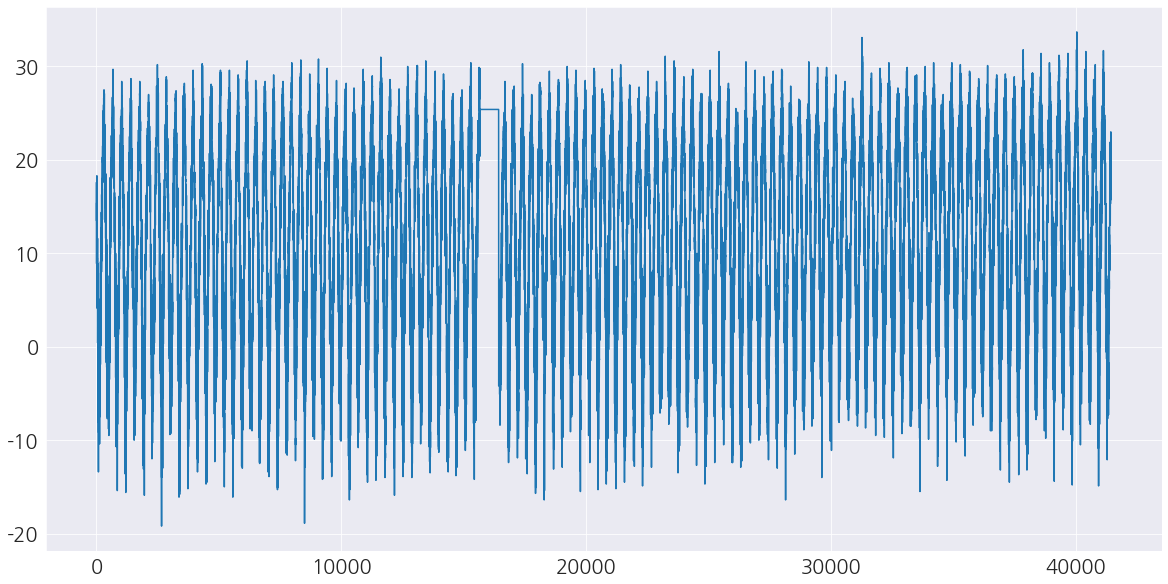

In [16]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.rcParams.update({'font.size': 20})
df.loc[:, "평균기온"].plot.line(figsize=(20, 10), )  # 평균기온

# 최저, 평균, 최고기온 다 그려볼까요?

<AxesSubplot:title={'center':'날짜별 기온추이'}, xlabel='날짜', ylabel='기온'>

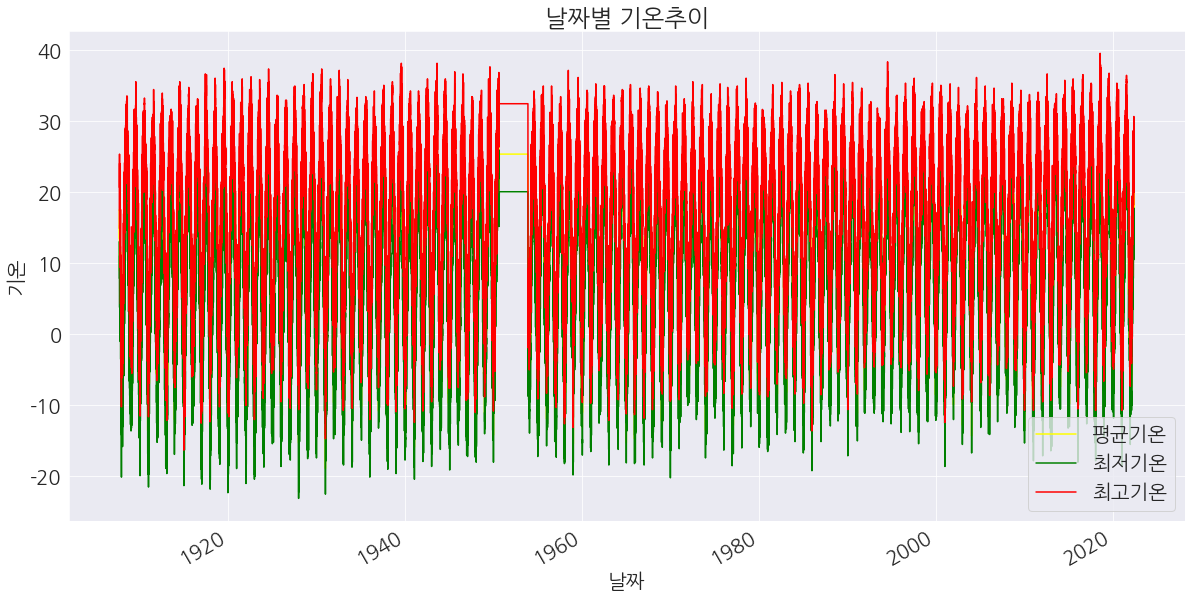

In [18]:
df.plot.line(x="날짜", figsize=(20, 10),
             color={"최저기온": "green", "평균기온": "yellow", "최고기온": "red"},
             title="날짜별 기온추이",
             ylabel="기온")

# 너무 어지럽네요...

## ...다시 세 개를 분리해서 그려보면?

array([<AxesSubplot:xlabel='날짜'>, <AxesSubplot:xlabel='날짜'>,
       <AxesSubplot:xlabel='날짜'>], dtype=object)

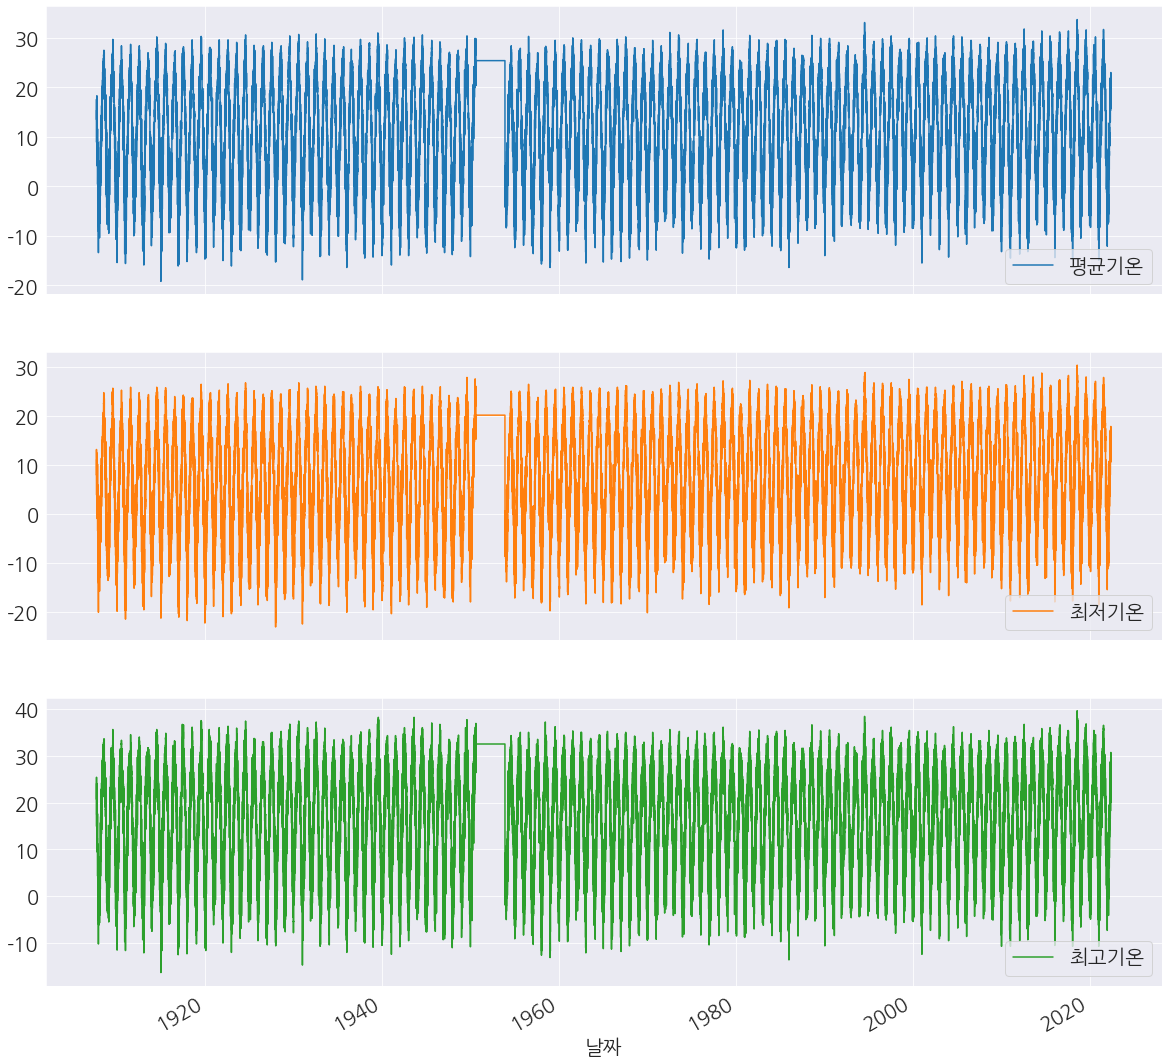

In [19]:
df.plot.line(x="날짜", figsize=(20, 20), subplots=True)

뛰어난 외과의사는 심전도 그래프만 봐도 이상한 부위를 짐작할 수 있다고 하던데..
저는 저거 아무리 쳐다봐도 도무지 모르겠네요. 더 확대를 해봐야 하나? (여러분은 어떠신가요?)

위의 그래프를 직관적으로 보면, 사람에 따라, 관점에 따라 여러 가지가 보입니다. 예를 들면,
최근 들어 기온 상승세가 시작된 것 같다든지, 변동이 커진 것 같다든지,
정확하지는 않지만 대략의 느낌으로 볼 때 여러 가지 가설을 세워볼 수 있을 것 같습니다.
나중에 보다 정확한 통계 기법을 적용해서 여러가지 가설을 세우고 검증해 보면 좋겠네요.

그건 그렇고 저 그래프는 "일별"이라서,
분리를 해놔도 위아래 진폭도 너무 심하고, 읽기도 어렵고
인사이트를 찾아내기에는 너무 막연하네요.
조금 단순화를 할 필요가 있겠어요.

# 연도별로 평균기온을 집계해서 그래프를 다시 그려보면 어떨까요?

In [20]:
df["연도"] = df["날짜"].apply(lambda x: x.year)
# df["연도"] = df["날짜"].str.split("-")[0]  # 문자열이었다면!

df.head()  # 오른쪽 끝에 "연도"칼럼이 추가되었습니다. 이걸 기준으로 그룹화해보시죠.

,날짜,평균기온,최저기온,최고기온,연도
0,1907-10-01,13.5,7.9,20.7,1907
1,1907-10-02,16.2,7.9,22.0,1907
2,1907-10-03,16.2,13.1,21.3,1907
3,1907-10-04,16.5,11.2,22.0,1907
4,1907-10-05,17.6,10.9,25.4,1907


In [21]:
df_year = df.groupby(by="연도").mean()
df_year.tail()

,평균기온,최저기온,최고기온
연도,,,
2018,13.002466,8.871233,17.956986
2019,13.598904,9.321096,18.602192
2020,13.271858,9.389617,17.867213
2021,13.752055,9.622466,18.491781
2022,7.589262,3.024161,12.915436


# 2022년 여름은 아직...

2022년은 아직 뜨거운 여름이 안 와서, 최고기온 평균이 평년 대비 굉장히 낮네요.
먼저 플로팅을 해보시죠.

# 연도별 최고기온 시각화

<AxesSubplot:xlabel='연도'>

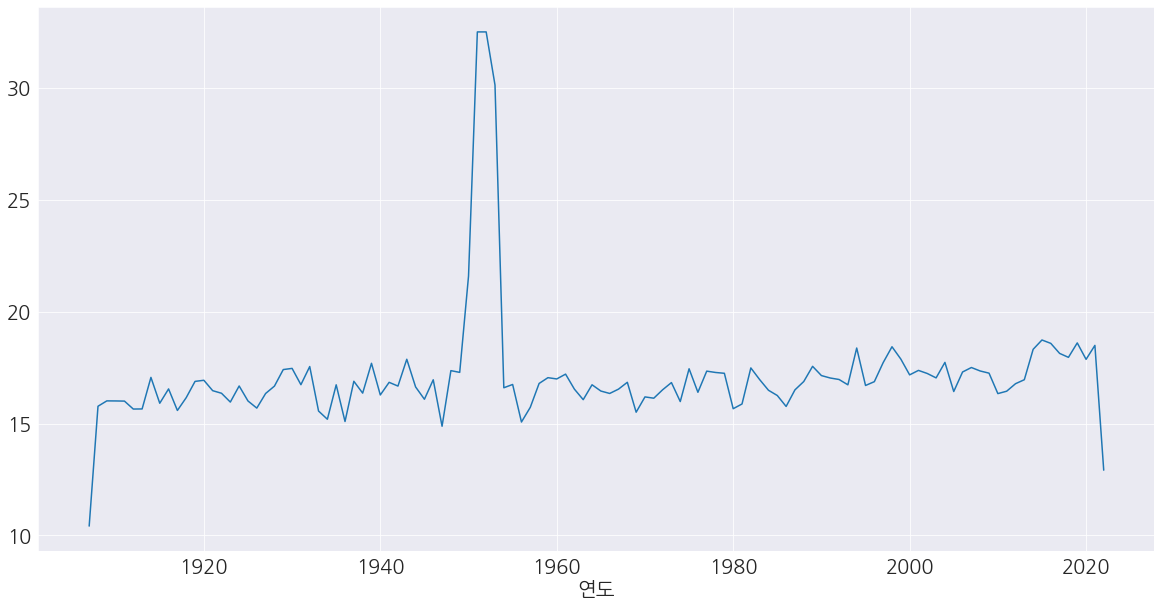

In [22]:
df_year["최고기온"].plot.line(figsize=(20, 10))

# 데이터 중에 튀는 값이 있네요?

![](https://imgdb.in/k16a.jpg)

왜 튀는지 이유를 한 번 생각해봅시다.
1_ 시작부분 쑥 내려간 부분,
2_ 중간에 30도가 넘는 부분,
3_ 2022년에 다시 쑥 내려간 부분 세 개가 조금 이상해 보입니다.

# describe로 df_year의 기술통계값 확인해보기

In [23]:
df_year.describe()

,평균기온,최저기온,최고기온
count,116.000000,116.000000,116.000000
mean,12.047503,7.720534,17.114529
std,2.434627,2.470644,2.654329
min,5.103261,0.067391,10.416304
25%,10.972397,6.314652,16.236164
50%,11.711644,7.517397,16.761673
75%,12.529658,8.630389,17.342433
max,25.400000,20.100000,32.500000


최고기온 평균이 섭씨 17.1도인 것을 감안하면
차트 일부의 30도가 넘는 평균기온값은
확실히 잘못되어 있다는 걸 짐작할 수 있지요.

# 이상치 찾아보기 : 1950년대 부근 최대값

In [25]:
df_year[df_year["최고기온"] >= 30]

,평균기온,최저기온,최고기온
연도,,,
1951,25.40000,20.100000,32.500000
1952,25.40000,20.100000,32.500000
1953,23.29726,18.098904,30.126301


세 개 년도가 pad 채우기로 인해 특이한 평균값이 나와버렸네요.
(조금 더 고민해보면 좋은 해법이 있겠지만 당장은)
오염된 값을 제거한 후,
1954년부터 2021년까지의 데이터만 가지고 집계를 해봅시다.

In [26]:
df_year = df_year.loc[1954:2021]  # 판다스의 loc-인덱싱은 파이썬과 달리 마지막 인덱스(2021)를 포함시킴.
df_year.head()

,평균기온,최저기온,최고기온
연도,,,
1954,11.487945,7.181644,16.598082
1955,11.512877,7.116164,16.744658
1956,10.113388,5.842623,15.067213
1957,10.516438,6.226849,15.723836
1958,11.637260,7.394247,16.790137


<AxesSubplot:xlabel='연도'>

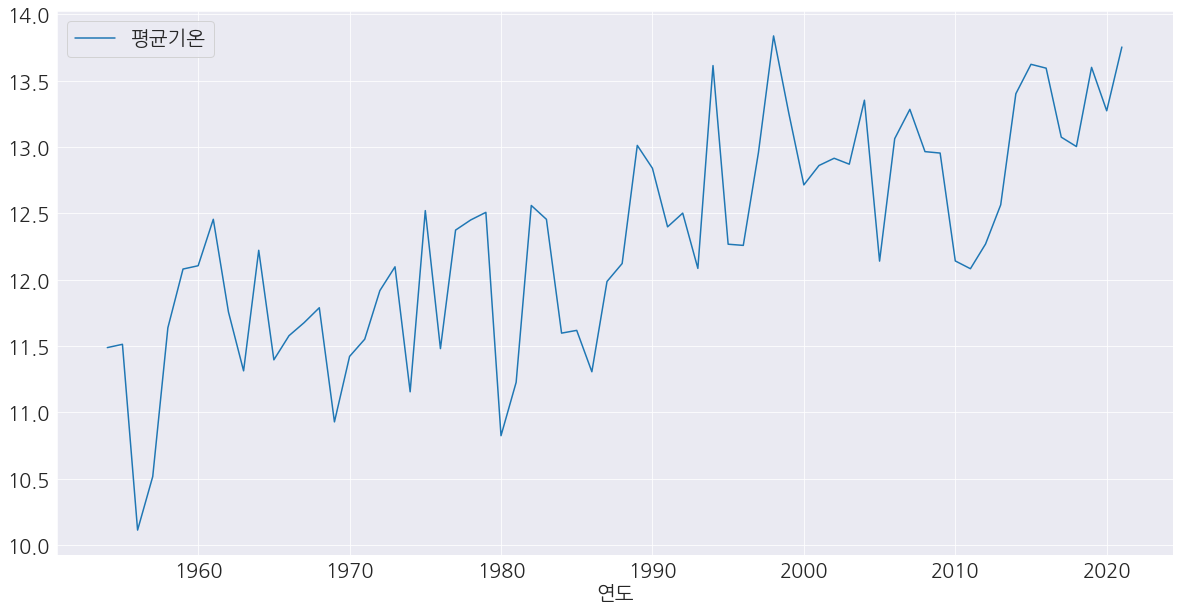

In [27]:
# df_year.loc[:, "평균기온"].plot.line(figsize=(20, 10))
df_year.plot.line(y="평균기온", figsize=(20, 10))

(서울시 특정 점의 기온에 국한한 내용이기는 하지만)
뚜렷하게 저점과 고점이 동시에 꾸준히 상승하고 있는 것을 확인할 수 있습니다.
여기서 잠깐 멈추고, 파이썬의 다양한 시각화 툴들을 간략히 소개드리겠습니다.

# 파이썬의 시각화 라이브러리

### matplotlib: 가장 대표적인 모듈, 파이썬 시각화의 시작과 끝!
https://matplotlib.org/
![](https://imgdb.in/k16F.jpg)

### seaborn: matplotlib의 래퍼(wrapper)모듈로 쓰기가 편해서 인기 치솟는 중
https://seaborn.pydata.org/
![](https://imgdb.in/k16I.jpg)

### bokeh: 인터랙티브하고 선명한 색감의 차트. (인기 많았는데 plotly에 밀림)
https://bokeh.pydata.org/
![](https://imgdb.in/k16S.jpg)

### bokeh와 plotly의 명암...
![](https://imgdb.in/k1eR.png)

### plotly: js기반 인터랙티브차트를 생성하고 웹으로 무료공유 가능. 요즘대세!
지만... 논문이나 보고서에 넣는 스타일은 아님.

https://plotly.com/python/
![](https://imgdb.in/k16Q.jpg)


### pygal: 아직은 "그밖에" 안에 들어있을 법한 모듈이지만, 특별한 차트가 필요할 때 찾게 됨
https://www.pygal.org/en/stable/
![](https://imgdb.in/k16Y.jpg)

### dash: plotly의 자회사 같은 곳. "이런 차트 쉽게 못그리나?" 할 때 자주 찾게 됨. 인기 치솟는 중
https://plot.ly/products/dash/
![](https://imgdb.in/k171.jpg)

### altair: 이건 무슨 듣잡인가 싶지만, 굵직한 툴임.
하여튼 vega라는 선언적 문법(declarative grammar) 언어로 차트를 만드는 툴입니다.
자바스크립트기반에 탄탄한 베가 문법이 뒷받침되어 재미있는 인터랙션이 많습니다.

https://altair-viz.github.io
![](https://imgdb.in/k174.jpg)


### 이밖에도 pydot, ggplot, geoplotlib, missingno, gleam, leather...

그밖의 그밖까지 소개해 드렸지만 하나하나 유명하기도 하고 특색도 있습니다.
다들 스타일이나 용도, 강점이 조금씩 다르긴 한데,
웹기반의 인터랙티브한 플롯을 원한다면 대부분 plotly,
출판물 수준의 플롯을 원한다면 **seaborn**을 많이 선택하는 편입니다.
(그리고 seaborn의 속은 matplotlib으로 만들어져 있습니다.)


# 이쯤에서 seaborn 맛보기

sns(seaborn)는 굉장히 직관적이고 단순한 커맨드가 큰 장점입니다.
물론 보고서나 논문 수준으로 디테일을 잡으려면 mpl(matplotlib)의 도움을 받아야 하지만,
나 혼자 또는 동료들과 확인하는 용도라면 코드 한두 줄로도
충분히 예쁘고 다양한 차트를 그리고, 테마도 바꾸는 등의 장점이 큽니다.

# ※ sns 예시코드1 : 라인플롯

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

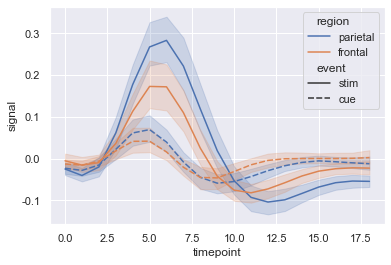

In [28]:
import seaborn as sns

sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

# sns예시코드2: 페어플롯

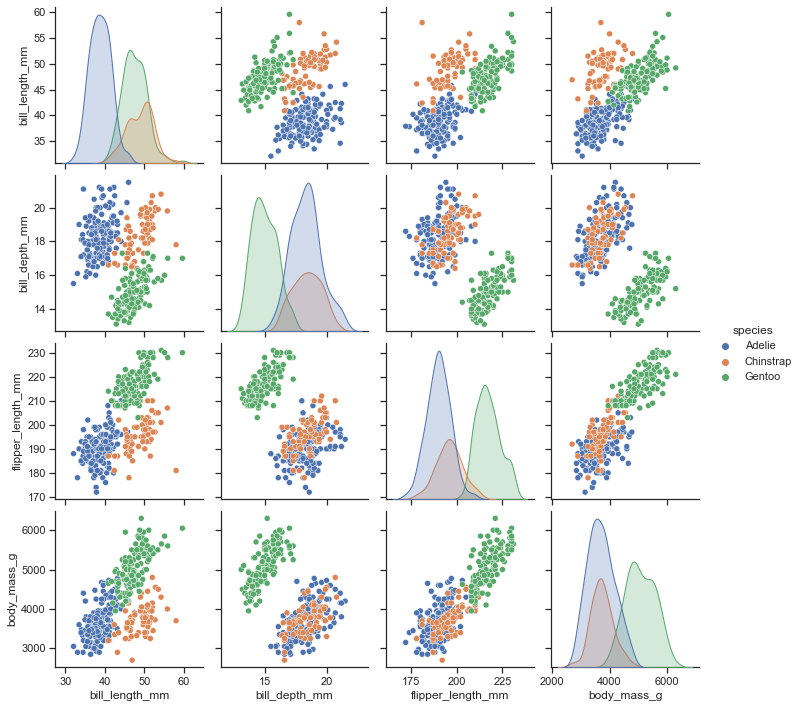

In [29]:
import seaborn as sns

sns.set_theme(style="ticks")

df_peng = sns.load_dataset("penguins")
sns.pairplot(df_peng, hue="species")

# sns 예시코드3: 박스플롯에 관측치 겹치기

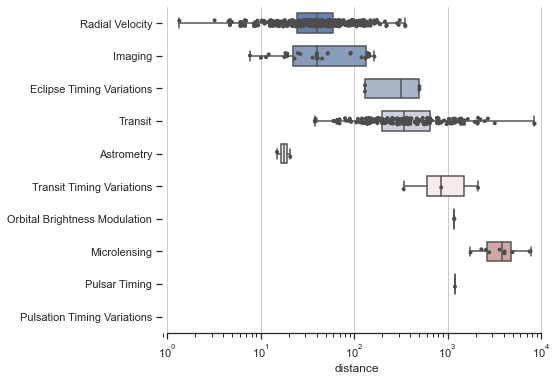

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

# Load the example planets dataset
planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="distance", y="method", data=planets,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="distance", y="method", data=planets,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

# 다시 우리들의 기온데이터 셋으로 돌아와서

<AxesSubplot:xlabel='연도', ylabel='평균기온'>

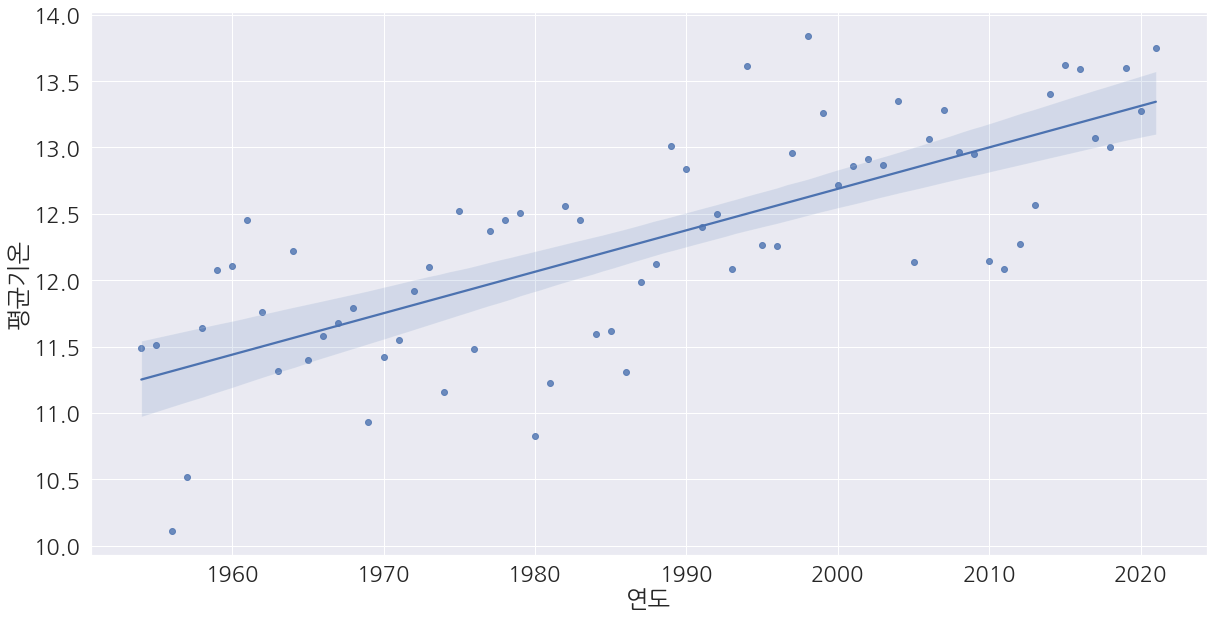

In [39]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns


sns.set(font_scale = 2)
fm.get_fontconfig_fonts()
font_location = r"C:\Users\smj02\anaconda3\Lib\site-packages\koreanize_matplotlib\fonts\NanumGothic.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)  # 이런 작업이 귀찮으시면 차트는 영어로...

plt.figure(figsize=(20, 10))
sns.regplot(x=df_year.index, y='평균기온', data=df_year, fit_reg=True)  # sns와 df는 궁합이 좋음

# 최저, 평균, 최고기온을 한 피규어 안에 넣으려면?
간단합니다. 세 개 실행하시면 돼요.

<AxesSubplot:xlabel='연도', ylabel='최고기온'>

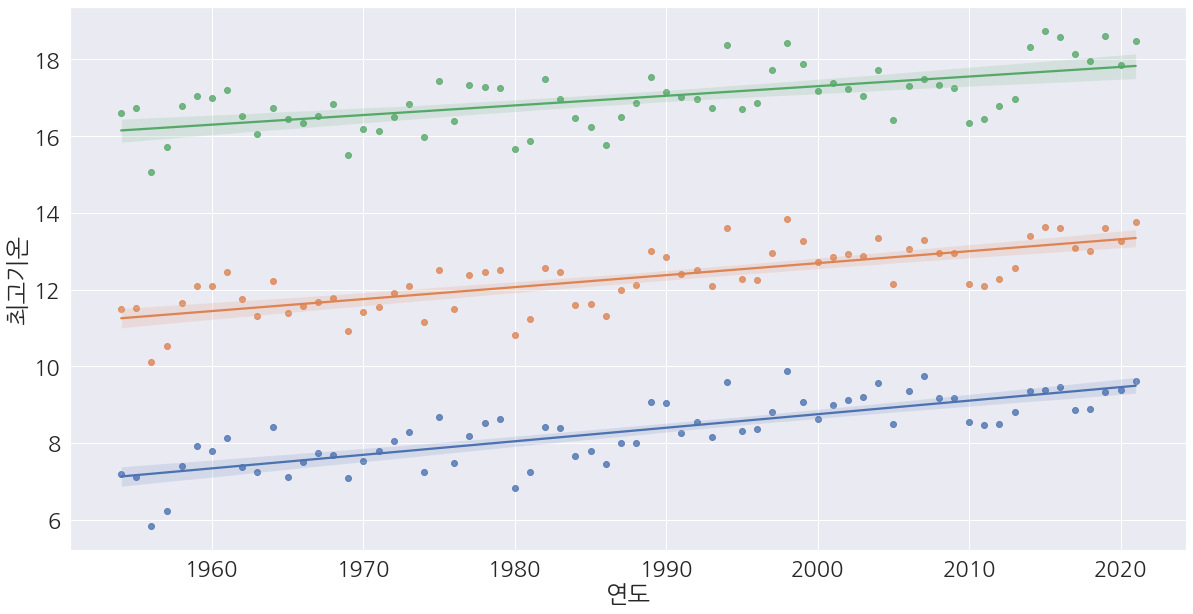

In [40]:
plt.figure(figsize=(20, 10))
sns.regplot(x=df_year.index, y='최저기온', data=df_year, fit_reg=True)  # sns와 df는 궁합이 좋음
sns.regplot(x=df_year.index, y='평균기온', data=df_year, fit_reg=True)  # sns와 df는 궁합이 좋음
sns.regplot(x=df_year.index, y='최고기온', data=df_year, fit_reg=True)  # sns와 df는 궁합이 좋음

그런데 y축도 "기온"으로 바꾸고 싶고, 중간에 "범례"도 넣어보고 싶습니다.
sns는 mpl(matplotlib)의 래퍼모듈이라고 말씀드렸잖아요?
그래서 세부설정은 mpl로 잡으시면 됩니다.



전지구적 기온상승이 사실 어제오늘 듣는 생소한 이야기는 아니지만
이렇게 간단히 시각화를 해보니,더 뚜렷하게 상승추세가 와닿는 느낌입니다.

마지막으로 복습 겸 몇 가지 간단한 질문에 답을 구해봅시다.

# 1. 서울의 기온이 가장 높았던 날의 날짜와 기온 구하기

In [41]:
df.head()

,날짜,평균기온,최저기온,최고기온,연도
0,1907-10-01,13.5,7.9,20.7,1907
1,1907-10-02,16.2,7.9,22.0,1907
2,1907-10-03,16.2,13.1,21.3,1907
3,1907-10-04,16.5,11.2,22.0,1907
4,1907-10-05,17.6,10.9,25.4,1907


In [42]:
df["max_rank"] = df["최고기온"].rank(method="max", ascending=False)
df.head()

,날짜,평균기온,최저기온,최고기온,연도,max_rank
0,1907-10-01,13.5,7.9,20.7,1907,18852.0
1,1907-10-02,16.2,7.9,22.0,1907,17288.0
2,1907-10-03,16.2,13.1,21.3,1907,18167.0
3,1907-10-04,16.5,11.2,22.0,1907,17288.0
4,1907-10-05,17.6,10.9,25.4,1907,12432.0


In [43]:
df[df["max_rank"] == 1][["날짜", "평균기온", "최저기온", "최고기온"]]

,날짜,평균기온,최저기온,최고기온
40051,2018-08-01,33.6,27.8,39.6


2018년 8월의 폭염은 비단 우리나라 뿐만 아니라 전 세계에 경종을 울려주었죠.

# 관련뉴스

## 2018년 폭염 사망자 48명 아닌 160명(한겨레)
https://h21.hani.co.kr/arti/special/special_general/47876.html

## 나무위키, "2018년 폭염"
https://namu.wiki/w/2018%EB%85%84%20%ED%8F%AD%EC%97%BC

# 2. 내 생일의 기온변화를 그래프로 그리기

In [44]:
df["month"] = df["날짜"].apply(lambda x: x.month)
df["day"] = df["날짜"].apply(lambda x: x.day)
df.head()

,날짜,평균기온,최저기온,최고기온,연도,max_rank,month,day
0,1907-10-01,13.5,7.9,20.7,1907,18852.0,10,1
1,1907-10-02,16.2,7.9,22.0,1907,17288.0,10,2
2,1907-10-03,16.2,13.1,21.3,1907,18167.0,10,3
3,1907-10-04,16.5,11.2,22.0,1907,17288.0,10,4
4,1907-10-05,17.6,10.9,25.4,1907,12432.0,10,5


In [50]:
df_myb = df[(df.month == 2) & (df.day == 26)]
df_myb = df_myb.drop([15819, 16154])

<AxesSubplot:xlabel='연도'>

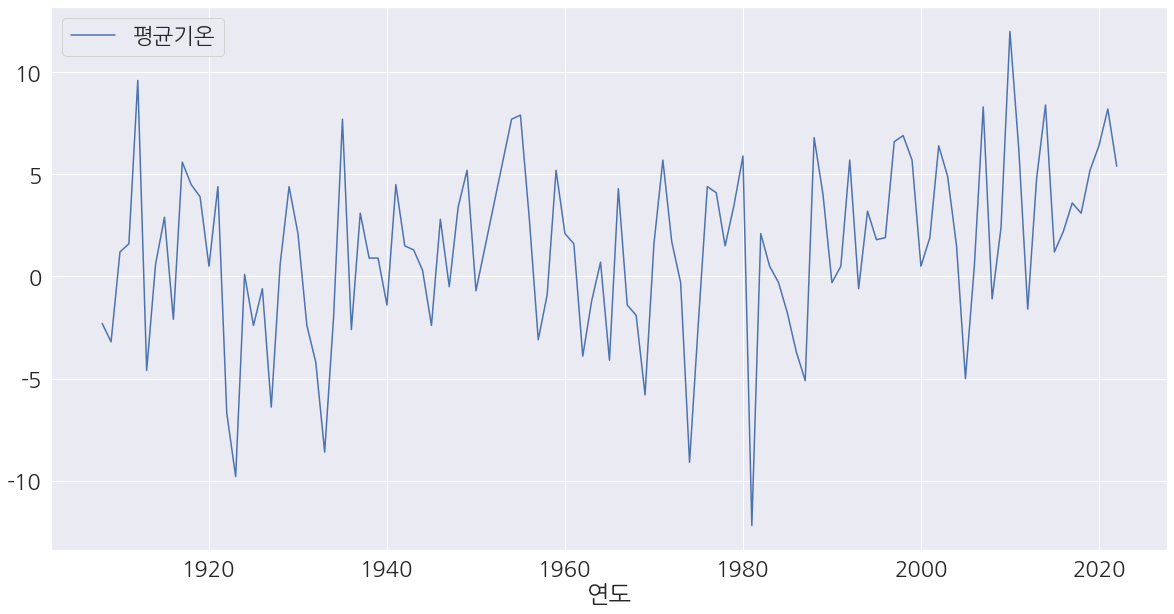

In [51]:
df_myb.plot.line(x="연도", y="평균기온", figsize=(20, 10))

In [62]:
# 제 생일인 2월 26일의 최저기온은 영하가 많을까요, 영상이 많을까요?
print(f"2월26일의 평균기온은: 섭씨{df_myb['평균기온'].mean():0.1f}도")
print("영상인 날 갯수: ", (df_myb["평균기온"] > 0).sum())
print("영하인 날 갯수: ", (df_myb["평균기온"] <= 0).sum())

2월26일의 평균기온은: 섭씨1.3도
영상인 날 갯수:  73
영하인 날 갯수:  39




# 1년 중 평균 일교차가 가장 큰 달은 몇월일까?

같이 작성해봅시다.